In [132]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import MySQLdb
import datetime
from sklearn.metrics import auc, mean_squared_error

In [115]:
import codecs
import lxml
from lxml import etree
import os
from mmap import mmap
import re
from os import listdir
from os.path import isfile, join
import MySQLdb
from datetime import datetime

In [67]:
import matplotlib as mpl
import datetime

In [148]:
whole_res = pd.read_excel('fpk_data/model/whole_results.xls')

In [174]:
whole_res

,FlightID,Code,resHoldTotal,DptDt,fltNrDptDt,fltNrArrDt,DptTime,ArrTime,flightNrSf,segment,...,IsWeekendDpt,DayOfWeekArr,WeekOfMonthArr,MonthArr,QuarterArr,YearArr,IsWeekendArr,Holiday,IsHoliday,predictions
0,25,0,0.0,2016-05-26,2016-05-26,2016-05-27,20,22,0,0,...,0,4,5,5,2,2016,0,0,0,0
1,25,1,0.0,2016-05-26,2016-05-26,2016-05-27,20,22,0,0,...,0,4,5,5,2,2016,0,0,0,0
2,25,2,5.0,2016-05-26,2016-05-26,2016-05-27,20,22,0,0,...,0,4,5,5,2,2016,0,0,0,3
3,25,3,2.0,2016-05-26,2016-05-26,2016-05-27,20,22,0,0,...,0,4,5,5,2,2016,0,0,0,2
4,25,0,2.0,2016-05-26,2016-05-26,2016-05-27,20,3,0,1,...,0,4,5,5,2,2016,0,0,0,0
5,25,1,3.0,2016-05-26,2016-05-26,2016-05-27,20,3,0,1,...,0,4,5,5,2,2016,0,0,0,1
6,25,2,1.0,2016-05-26,2016-05-26,2016-05-27,20,3,0,1,...,0,4,5,5,2,2016,0,0,0,2
7,25,3,0.0,2016-05-26,2016-05-26,2016-05-27,20,3,0,1,...,0,4,5,5,2,2016,0,0,0,2
8,25,0,0.0,2016-05-26,2016-05-26,2016-05-27,20,7,0,2,...,0,4,5,5,2,2016,0,0,0,1
9,25,1,11.0,2016-05-26,2016-05-26,2016-05-27,20,7,0,2,...,0,4,5,5,2,2016,0,0,0,6


In [189]:
data = whole_res.groupby(['FlightID', "Code", "fltNrDptDt", "flightNrSf"], as_index = False)['resHoldTotal', 'predictions'].sum()
data.rename(columns={'flightNrSf':'FltNr', 'fltNrDptDt':'Date','resHoldTotal':'actual'}, inplace = True)
data.sort_values(['FltNr', 'Date'], inplace = True)
data = data.groupby(['FltNr', 'Date'], as_index = False)['actual', 'predictions'].sum()
data

,FlightID,Code,Date,FltNr,actual,predictions
0,25,0,2016-05-26,0,12.0,10
1,25,1,2016-05-26,0,61.0,46
2,25,2,2016-05-26,0,127.0,124
3,25,3,2016-05-26,0,95.0,102
4,74,2,2016-05-26,1,283.0,269
5,74,3,2016-05-26,1,226.0,209
6,162,0,2016-05-26,2,6.0,9
7,162,1,2016-05-26,2,42.0,43
8,162,2,2016-05-26,2,107.0,110
9,162,3,2016-05-26,2,100.0,79


## Графики

In [196]:
data.Date = pd.DatetimeIndex(data.Date)

{0: '10J', 1: '50M', 2: '9J', 3: '49J', 4: '337J', 5: '337ZH', 6: '138J', 7: '137YQ', 8: '102J', 9: '101J', 10: '88J', 11: '87J'}

In [191]:
len(data[data.FltNr == 0]), len(data[data.FltNr == 1]), len(data[data.FltNr == 2]), len(data[data.FltNr == 3]), len(data[data.FltNr == 4]), len(data[data.FltNr == 5]), len(data[data.FltNr == 6]), len(data[data.FltNr == 7]), len(data[data.FltNr == 8]), len(data[data.FltNr == 9]), len(data[data.FltNr == 10]), len(data[data.FltNr == 11])

(1432, 1310, 1433, 857, 457, 465, 291, 296, 116, 116, 114, 116)

**9J, 10J**

In [1]:
def countPercentError(fn):
    return str(1 - np.mean(np.abs(data[data.FltNr == fn].actual - data[data.FltNr == fn].predictions) / data[data.FltNr == fn].predictions)) + '%'

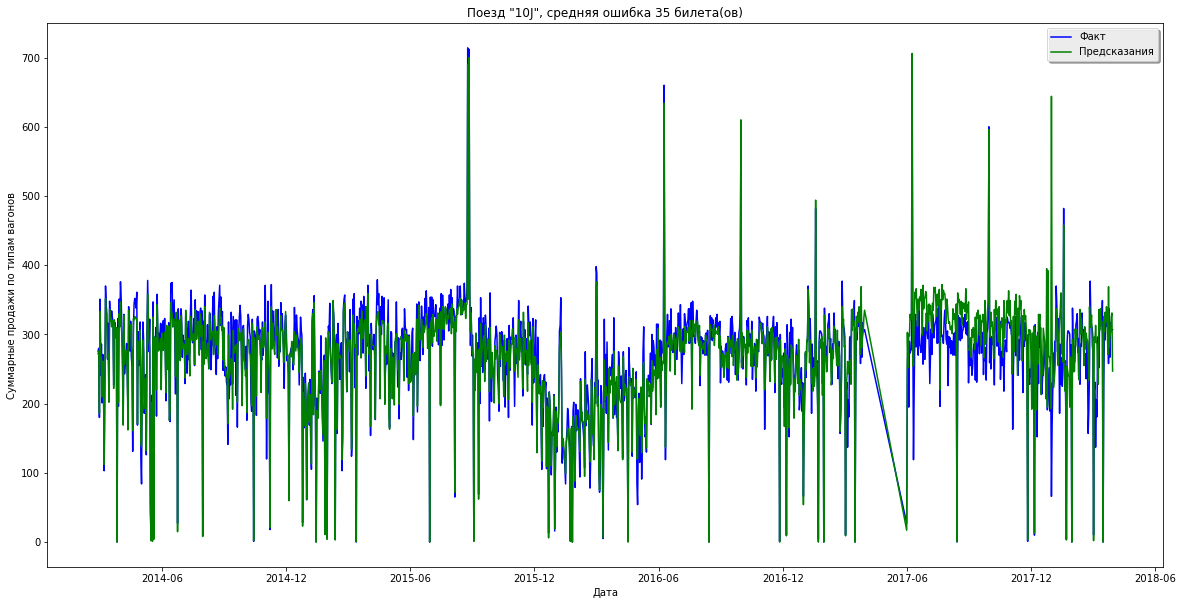

In [197]:
plt.figure(figsize=(20, 10))
fn = 2

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
pe = countPercentError(fn)

plt.title('Поезд "10J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

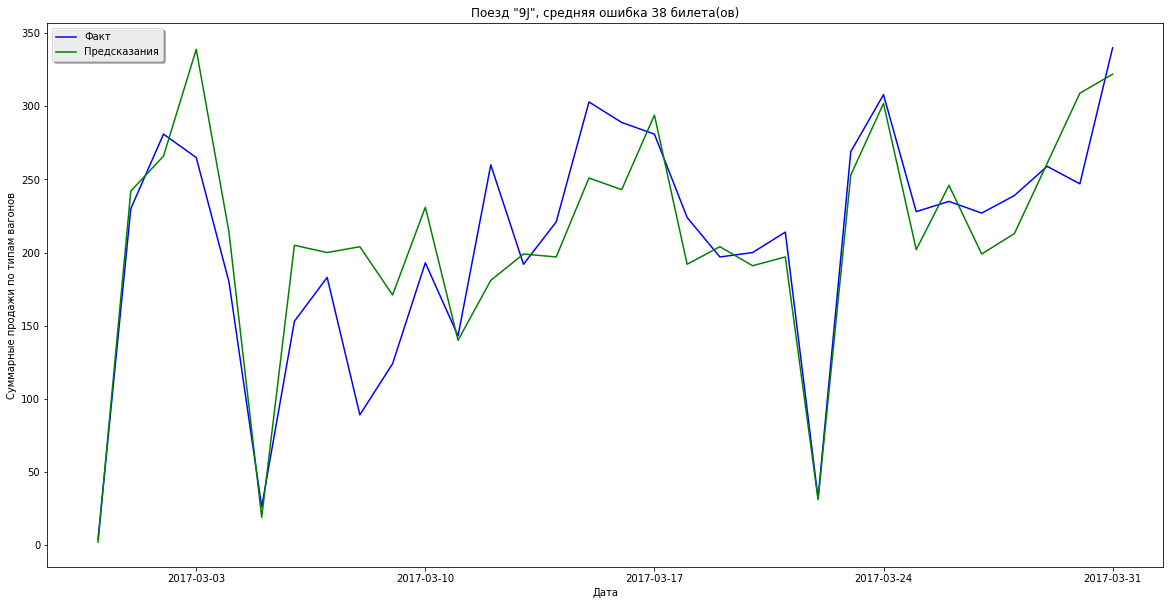

In [155]:
plt.figure(figsize=(20, 10))
fn = 0

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
plt.title('Поезд "9J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

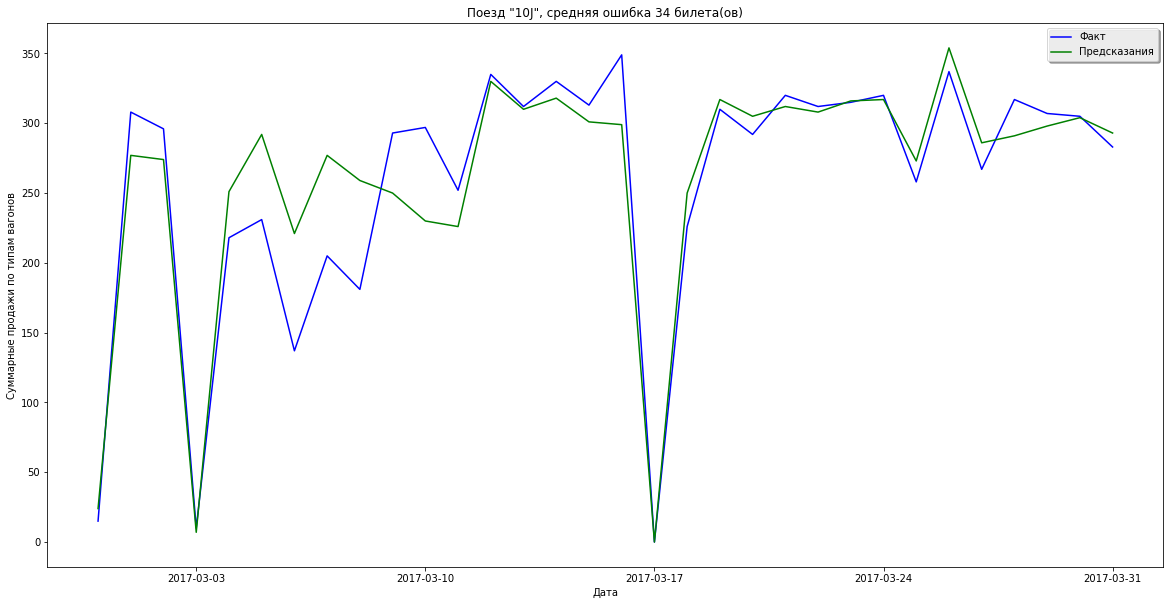

In [86]:
plt.figure(figsize=(20, 10))
fn = 2

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
plt.title('Поезд "10J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

**49J, 50M**

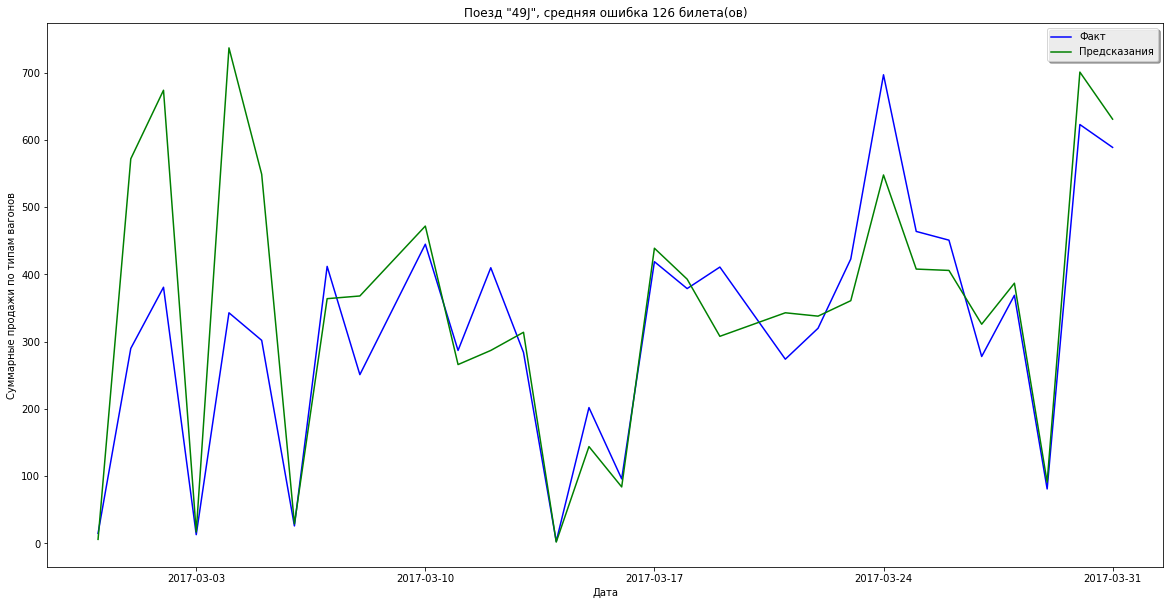

In [156]:
plt.figure(figsize=(20, 10))
fn = 1

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
plt.title('Поезд "49J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

124.325304142


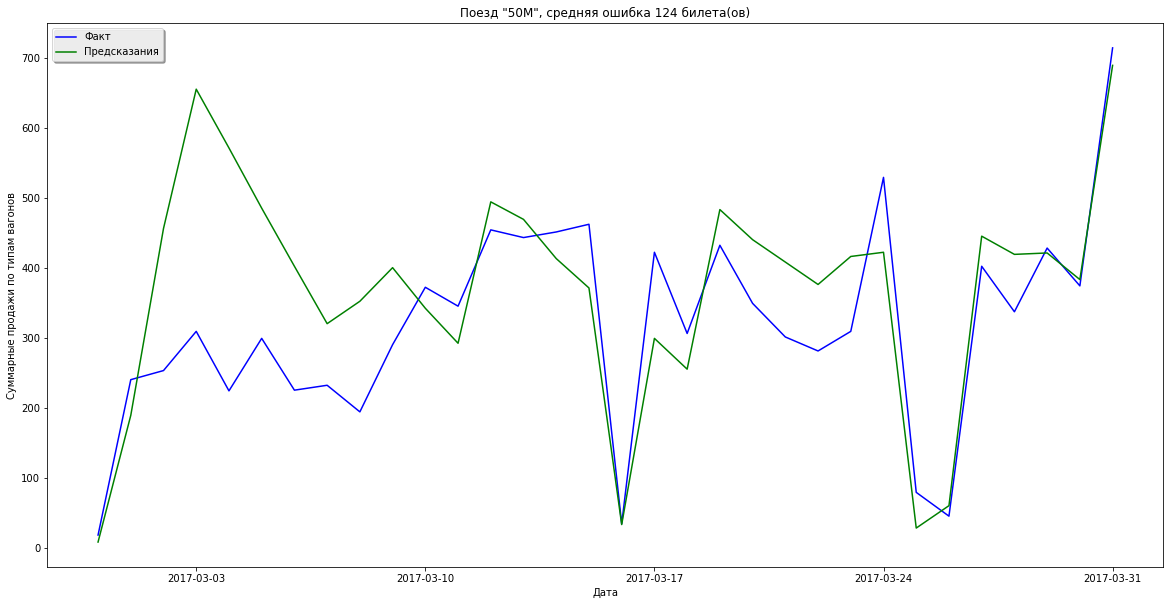

In [157]:
plt.figure(figsize=(20, 10))
fn = 3

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(mse)
plt.title('Поезд "50M", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

**138J, 137YQ**

216.148097378


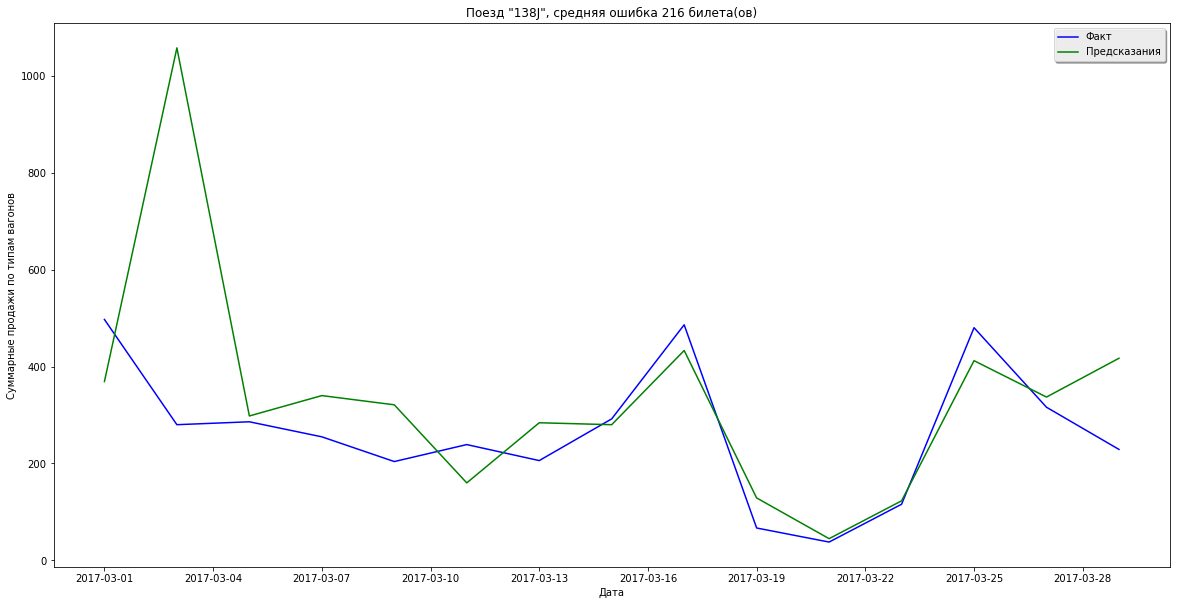

In [158]:
plt.figure(figsize=(20, 10))
fn = 6

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(mse)
plt.title('Поезд "138J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

86.4895224868


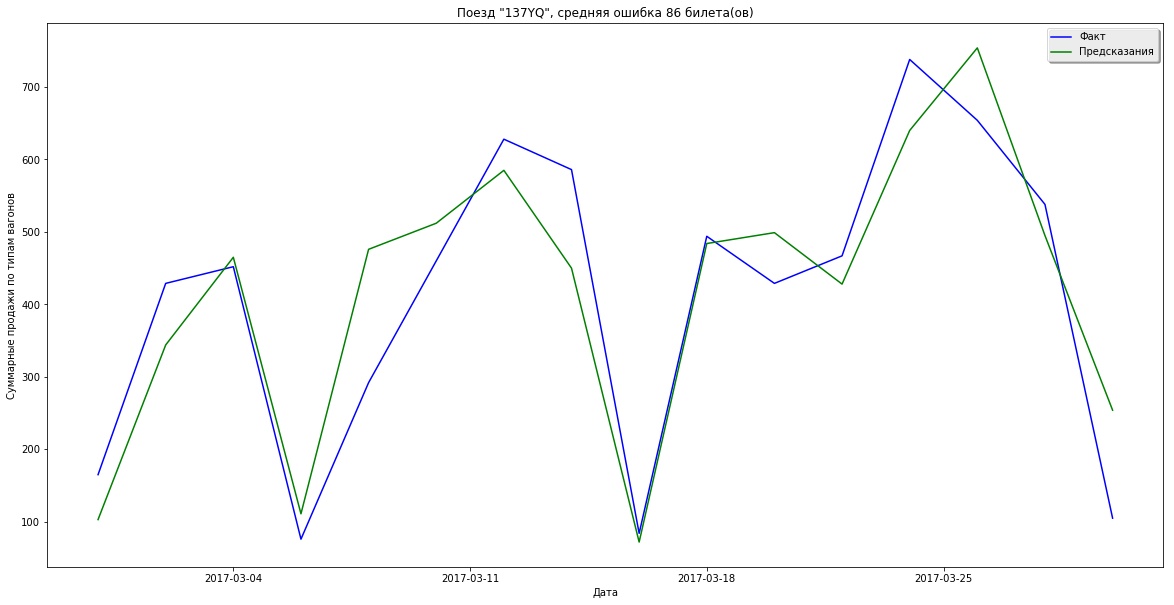

In [159]:
plt.figure(figsize=(20, 10))
fn = 7

x = np.arange(0, len(data[data.FltNr == fn]))
mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(mse)
plt.title('Поезд "137YQ", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

**337J, 337ZH**

100.958221557


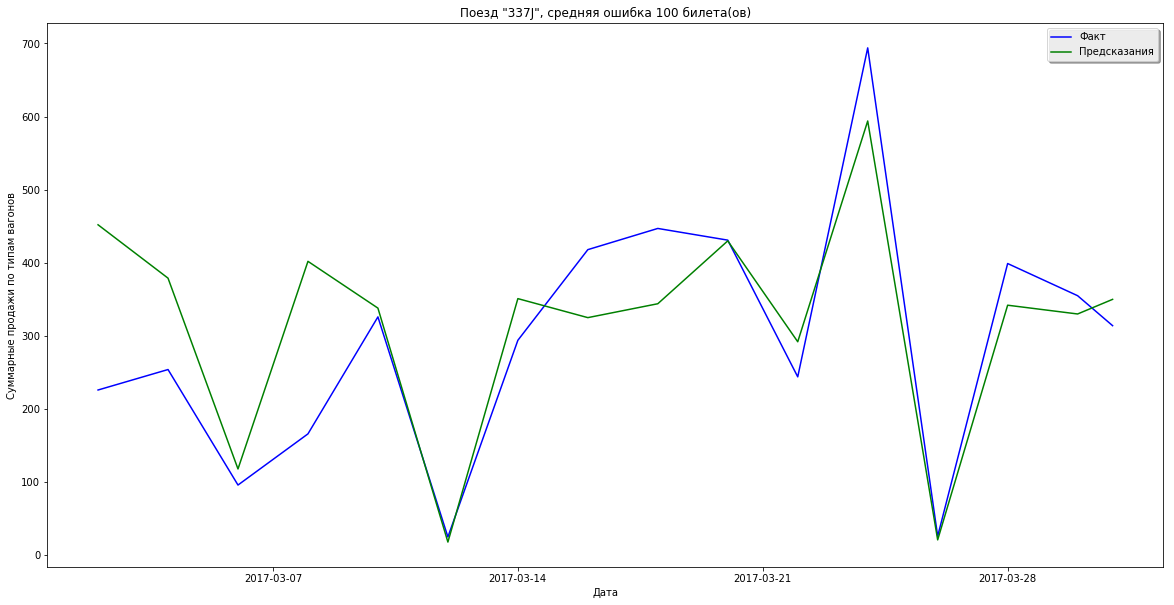

In [160]:
plt.figure(figsize=(20, 10))
fn = 4

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(mse)
plt.title('Поезд "337J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

91.4757481522


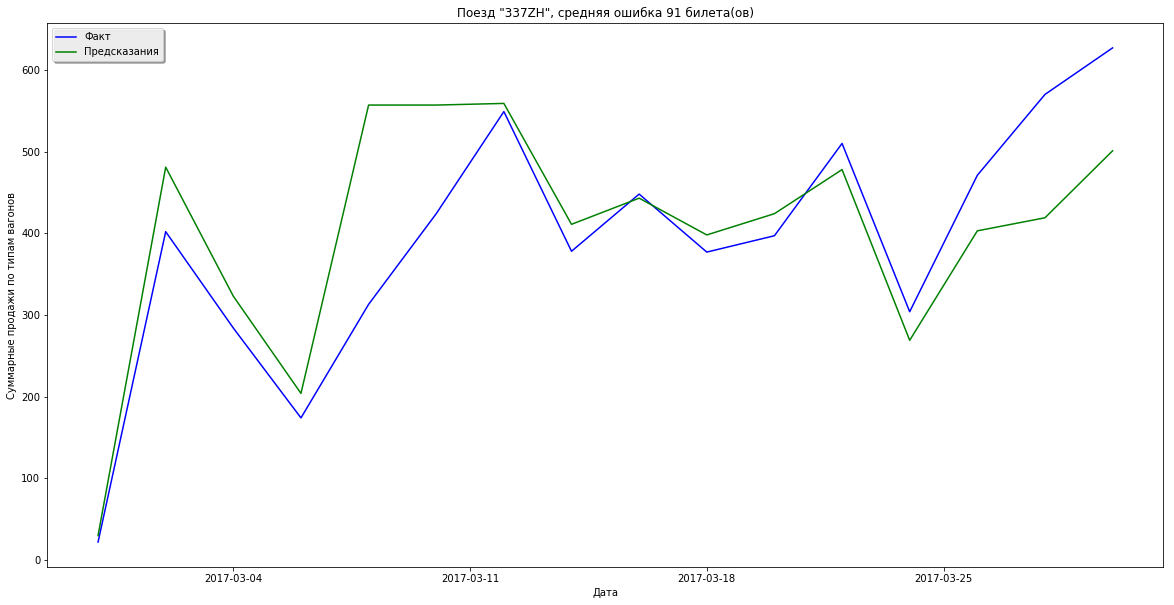

In [161]:
plt.figure(figsize=(20, 10))
fn = 5

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(mse)
plt.title('Поезд "337ZH", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

** 102J, 101J**

85.9375742424


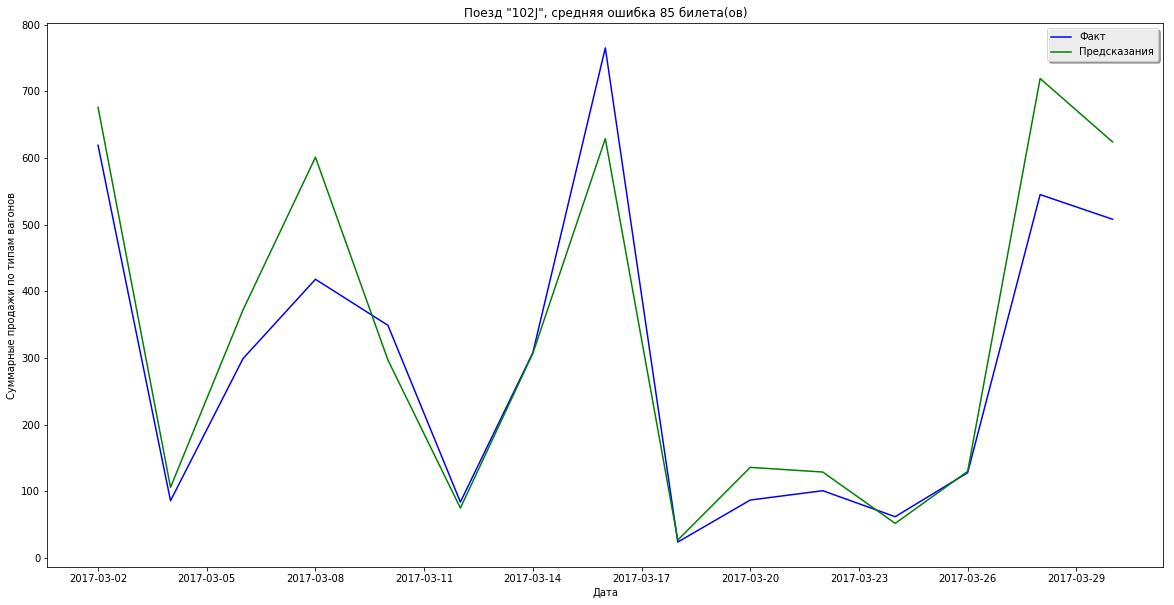

In [162]:
plt.figure(figsize=(20, 10))
fn = 8

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(mse)
plt.title('Поезд "102J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

87.3462935676


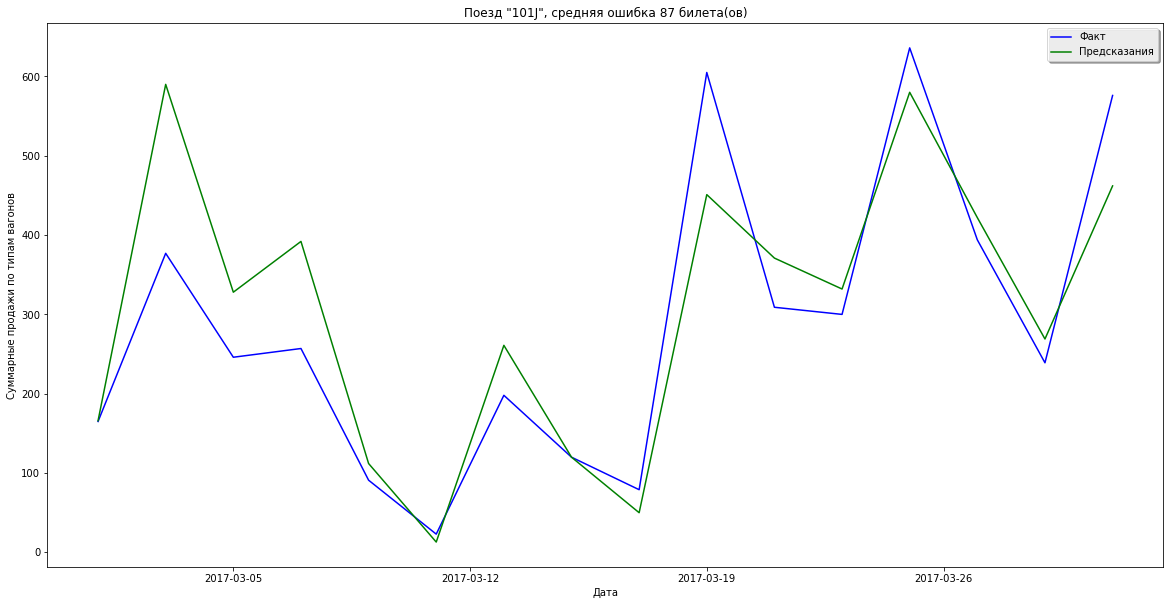

In [163]:
plt.figure(figsize=(20, 10))
fn = 9

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(mse)
plt.title('Поезд "101J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

**87J, 88J**

107.916325611


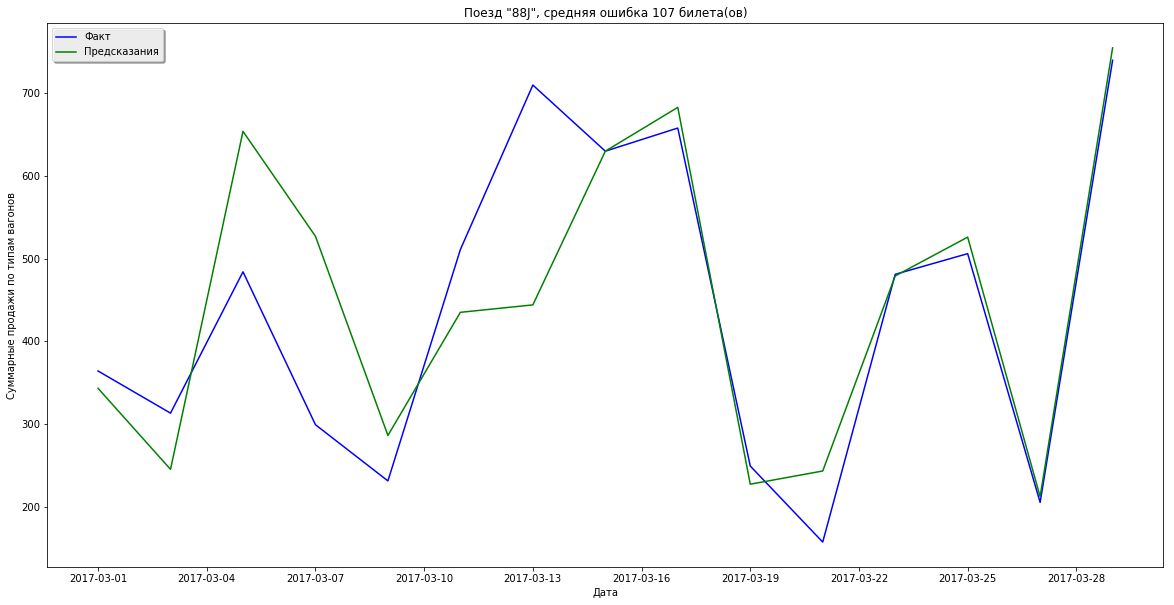

In [164]:
plt.figure(figsize=(20, 10))
fn = 10

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(mse)
plt.title('Поезд "88J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

52.5119034125


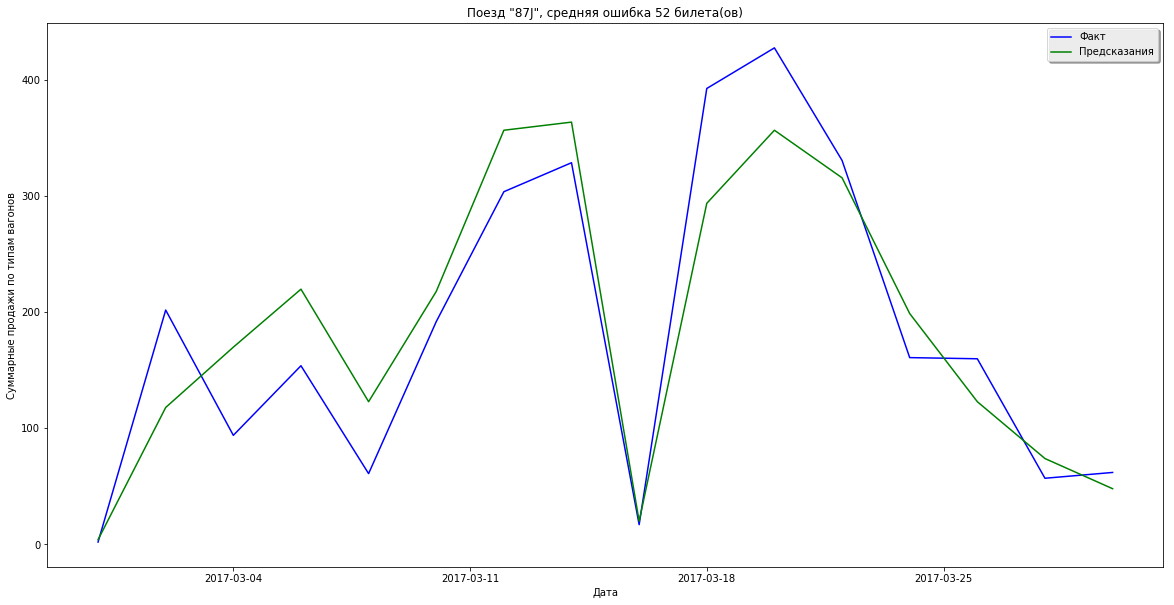

In [165]:
plt.figure(figsize=(20, 10))
fn = 11

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(mse)
plt.title('Поезд "87J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

**Общие**

In [166]:
data

,FltNr,Date,actual,predictions
0,0,2017-02-28,4,2
1,0,2017-03-01,230,242
2,0,2017-03-02,281,266
3,0,2017-03-03,265,339
4,0,2017-03-04,180,214
5,0,2017-03-05,26,19
6,0,2017-03-06,153,205
7,0,2017-03-07,183,200
8,0,2017-03-08,89,204
9,0,2017-03-09,124,171


In [205]:
data_all = data.groupby(['Date'], as_index=False)['actual', 'predictions'].sum()
data_all
# res_ss =  pd.DataFrame(columns = ("Date", "actual", "predictions"))
# count = 0
# for date in data[data.Date > '2017-03-15'].Date.unique():
#     res_ss.loc[count] = (date, sum(data[~data.FltNr.isin([1, 3])].actual[data.Date == date]), sum(data[~data.FltNr.isin([1, 3])].predictions[data.Date == date]))
#     count += 1

,Date,actual,predictions
0,2014-02-27,1163.0,1111
1,2014-02-28,1232.0,1202
2,2014-03-01,968.0,940
3,2014-03-02,645.0,607
4,2014-03-03,867.0,865
5,2014-03-04,967.0,900
6,2014-03-05,933.0,897
7,2014-03-06,1186.0,1148
8,2014-03-07,1228.0,1192
9,2014-03-08,609.0,597


In [207]:
np.mean(np.abs(data_all.actual - data_all.predictions) / data_all.predictions)

0.05399193181271028

188.368143728


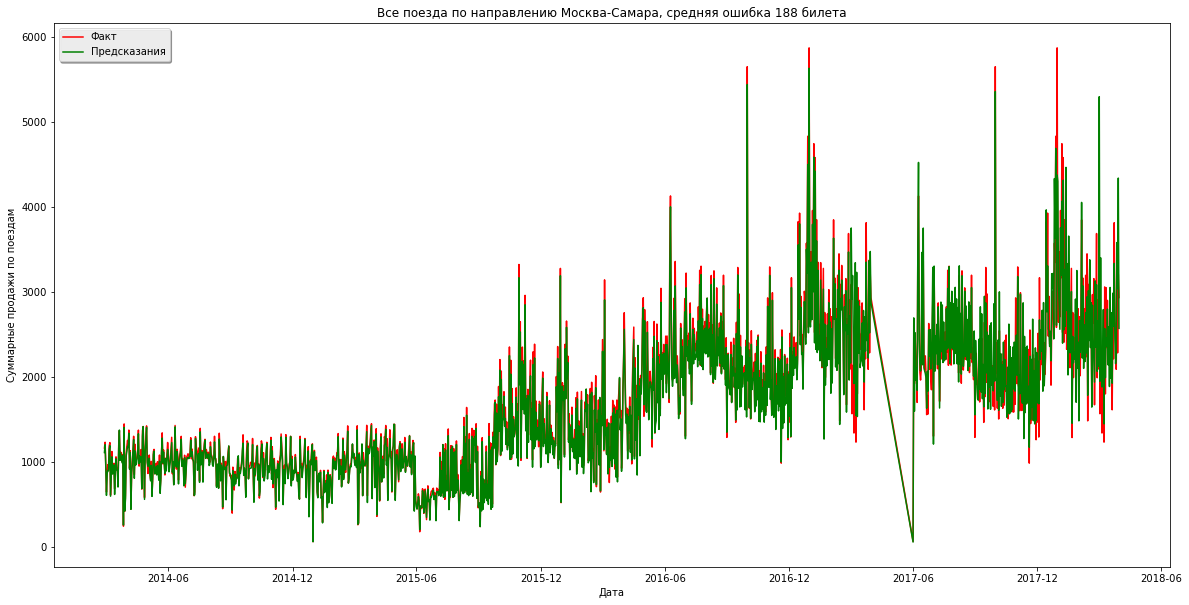

In [206]:
plt.figure(figsize=(20,10))
mse = np.sqrt(mean_squared_error(data_all.actual, data_all.predictions))
print(mse)
plt.title('Все поезда по направлению Москва-Самара, средняя ошибка ' + str(int(mse)) + ' билета')
plt.ylabel('Суммарные продажи по поездам')
plt.xlabel('Дата')
plt.plot(data_all.Date, data_all.actual, 'r', label = 'Факт')
plt.plot(data_all.Date, data_all.predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()